# Visualizing a Categorical and a Quantitative Variable

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
survey_data = pd.read_csv('../data/young-people-survey-responses.csv', index_col=0)
survey_data.sample(2)

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
876,5.0,3.0,5.0,2.0,5.0,4.0,2.0,4.0,3.0,few hours a day,5.0,19.0,1.0,male,city
863,5.0,5.0,5.0,3.0,1.0,5.0,2.0,3.0,3.0,few hours a day,3.0,21.0,1.0,male,village


In [18]:
student_data = pd.read_csv('../data/student-alcohol-consumption.csv', index_col=0)
student_data.sample(2)

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
310,GP,F,19,LE3,T,1,2,1,1,no,...,4,2,2,3,0,9,9,0,Urban,2 to 5 hours
181,GP,M,16,GT3,T,3,3,1,0,no,...,3,1,2,3,2,12,13,12,Urban,2 to 5 hours


## Count plots and bar plots

### Count plots

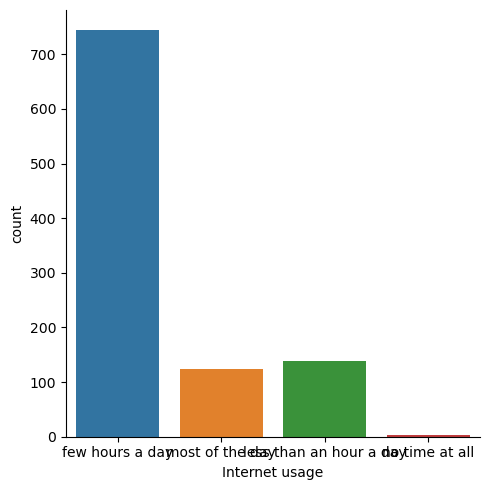

In [4]:
# Create count plot of internet usage
sns.catplot(
    data=survey_data,
    x='Internet usage',
    kind='count'
)

# Show plot
plt.show()

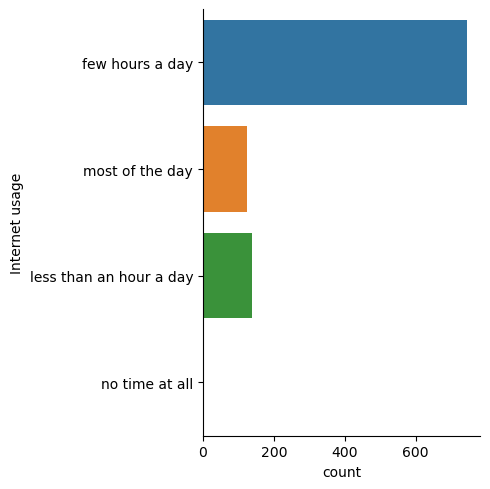

In [5]:
# Change the orientation of the plot
sns.catplot(
    data=survey_data,
    y='Internet usage',
    kind='count'
)

# Show plot
plt.show()

In [11]:
survey_data['Age Category'] = (survey_data['Age'] >= 21).map({True: '21+', False: 'Less than 21'})

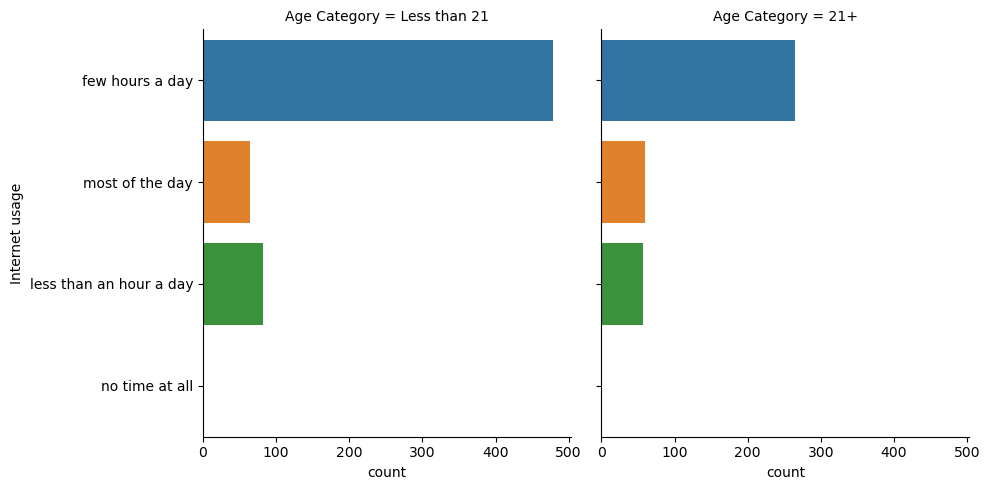

In [12]:
# Separate into column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data,
            kind="count", col='Age Category')

# Show plot
plt.show()

### Bar plots with percentages

In [15]:
survey_data['Interested in Math'] = (survey_data['Mathematics'] >=4)

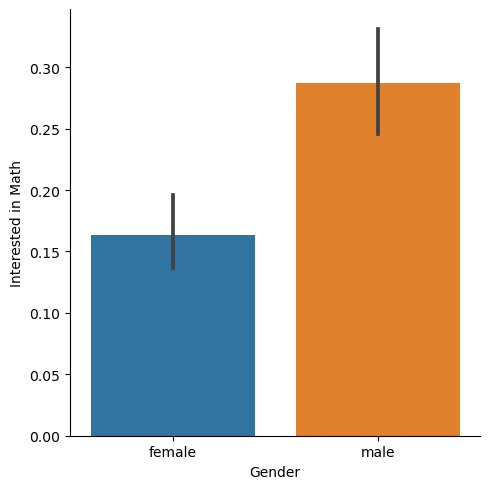

In [16]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(
    data=survey_data,
    x='Gender',
    y='Interested in Math',
    kind='bar'
)

# Show plot
plt.show()

### Customizing bar plots

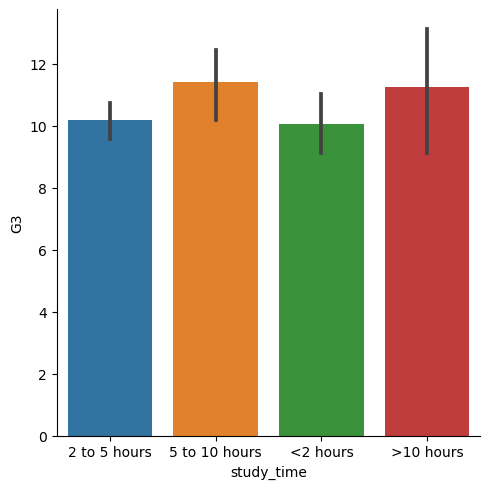

In [19]:
# Create bar plot of average final grade in each study category
sns.catplot(
    data=student_data,
    x='study_time',
    y='G3',
    kind='bar'
)

# Show plot
plt.show()

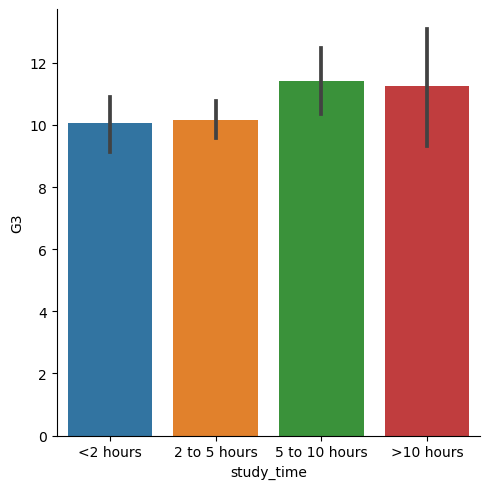

In [20]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Rearrange the categories
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=category_order)

# Show plot
plt.show()

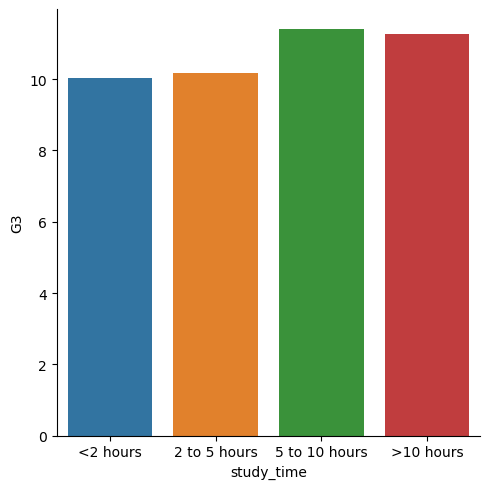

In [22]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=category_order,
            errorbar=None)

# Show plot
plt.show()

## Box plots

### Create and interpret a box plot

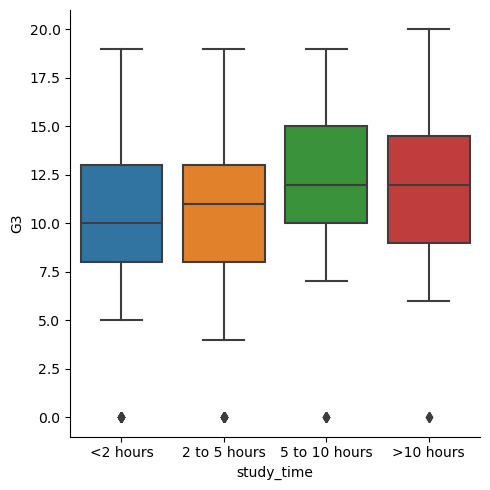

In [24]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(
    data=student_data,
    x='study_time',
    y='G3',
    kind='box',
    order=study_time_order
)

# Show plot
plt.show()

### Omitting outliers

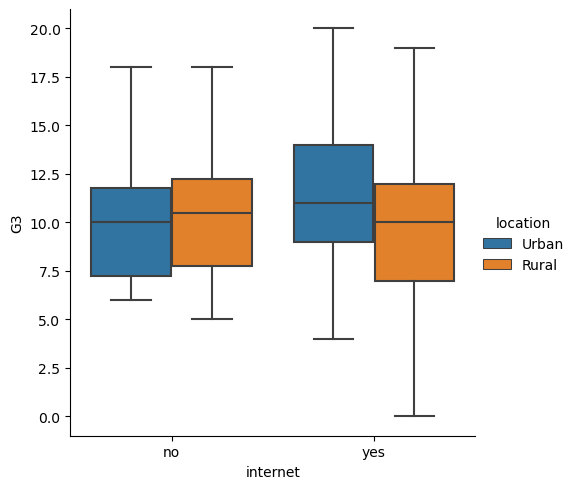

In [27]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(
    data=student_data,
    x='internet',
    y='G3',
    kind='box',
    hue='location',
    sym='',
)

# Show plot
plt.show()

### Adjusting the whiskers

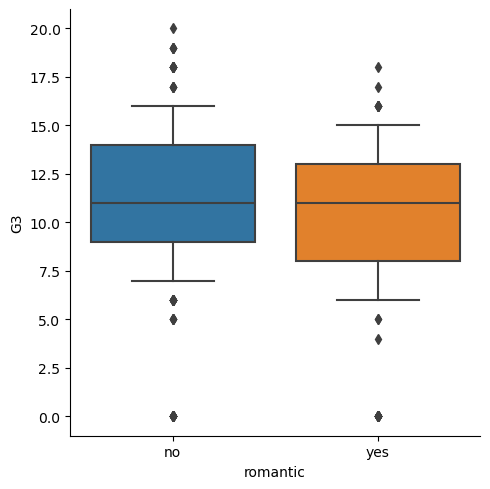

In [28]:
# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=0.5,)

# Show plot
plt.show()

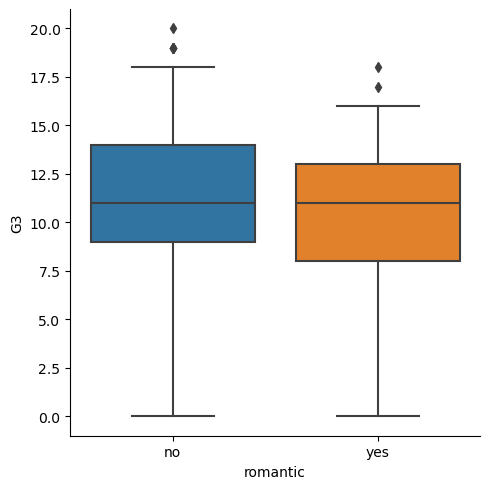

In [30]:
# Extend the whiskers to the 5th and 95th percentile
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[5, 95])

# Show plot
plt.show()

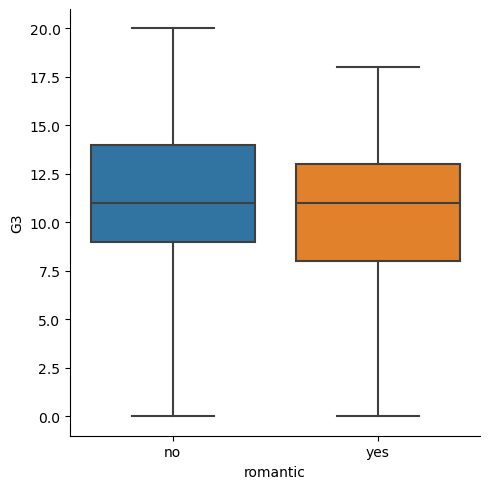

In [32]:
# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[0, 100])

# Show plot
plt.show()

## Point plots

### Customizing point plots

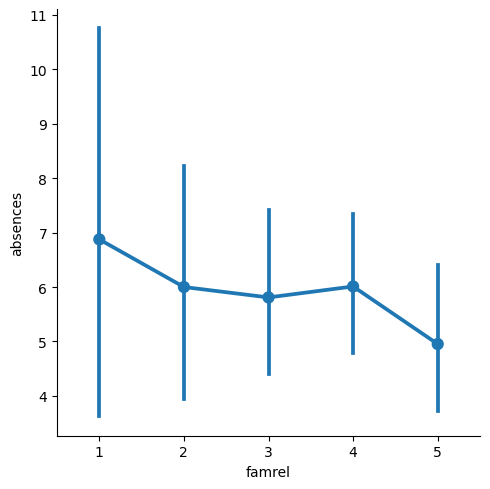

In [33]:
# Create a point plot of family relationship vs. absences
sns.catplot(
    data=student_data,
    x='famrel',
    y='absences',
    kind='point'
)
            
# Show plot
plt.show()

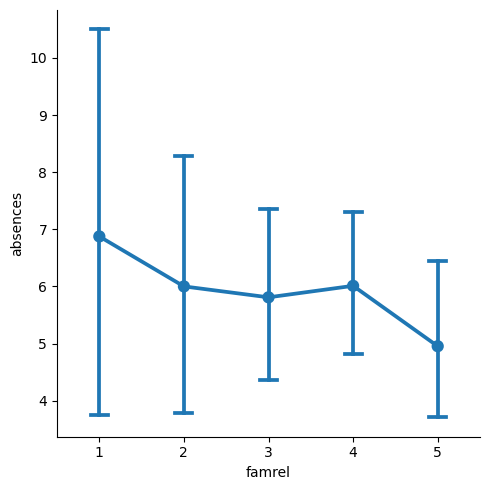

In [39]:
# Add caps to the confidence interval
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2)
        
# Show plot
plt.show()

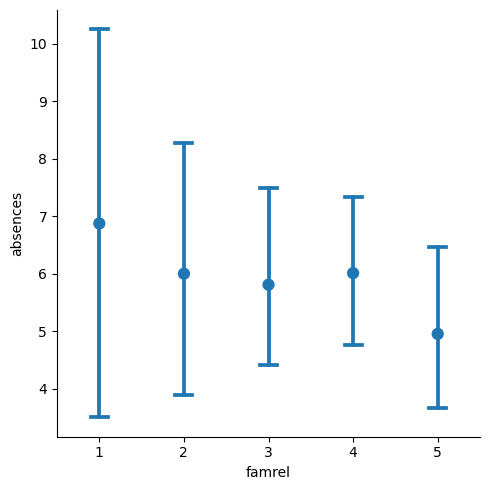

In [40]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2,
            join=False)
            
# Show plot
plt.show()

### Point plots with subgroups


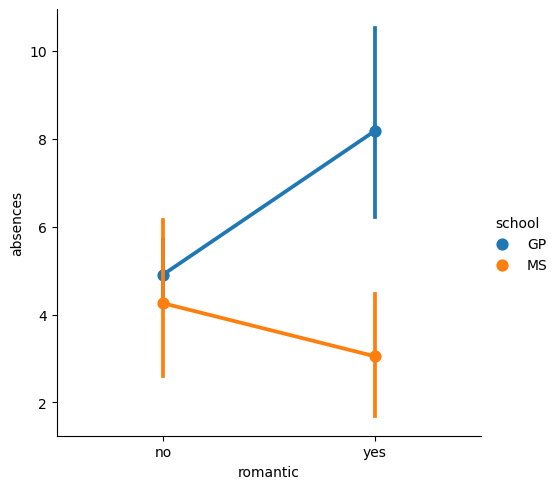

In [42]:
# Create a point plot that uses color to create subgroups
sns.catplot(
    data=student_data,
    x='romantic',
    y='absences',
    kind='point',
    hue='school'
)

# Show plot
plt.show()

/tmp/ipykernel_768597/3518986901.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="romantic", y="absences",


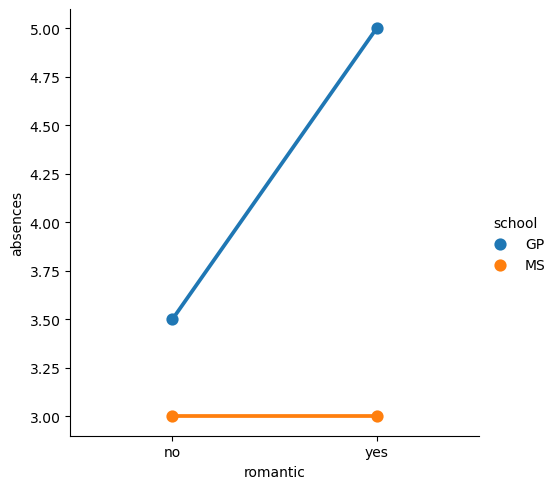

In [44]:
# Import median function from numpy
from numpy import median

# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            ci=None,
            estimator=median)

# Show plot
plt.show()